In [8]:
from wrangle import wrangle_data

import pandas as pd

from explore_module import viz_explore
import seaborn as sns
import matplotlib.pyplot as plt

# import smote

# initial assumptions:
* Gender: I think men will have higher rates
* age: older have higher rates
* hypertension: more stroke in those with hypertension
* heart disease: more stroke in those with heart disease
* ever_married: more stroke in single people
* work_type: not sure, maybe more stroke in those with their own business?? This is a wildcard for me
* residence type: urban will be higher than rural
* avg_glucose: more glucose more stroke
* bmi: more bmi more stroke

* require further exploration: i think married, work_type, and residence_type will be interesting to see interact with the target

In [9]:
train, validate, test = wrangle_data()

cat_cols: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'stroke', 'age_bins', 'glucose_bins', 'bmi_bins']
num_cols: ['age', 'avg_glucose_level', 'bmi']
Univariate assessment of feature gender:


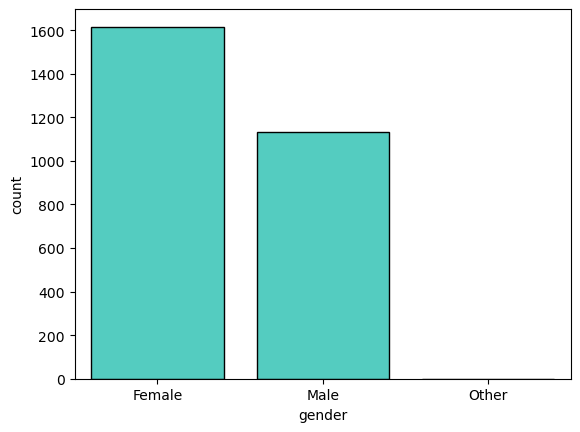

Univariate assessment of feature hypertension:


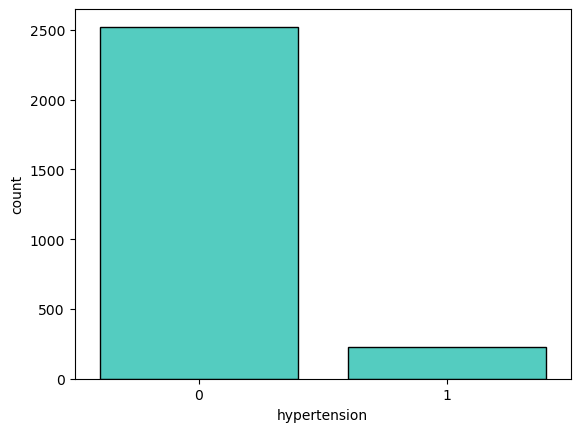

Univariate assessment of feature heart_disease:


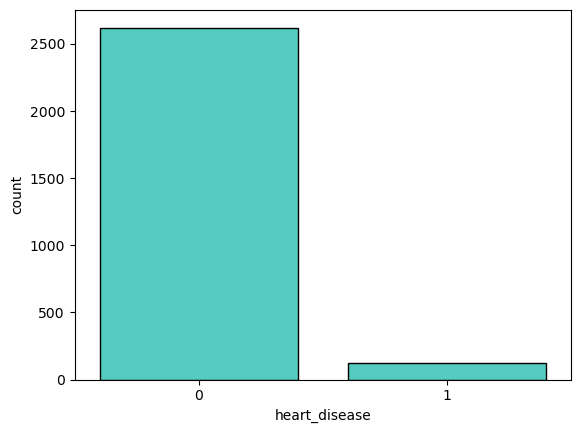

Univariate assessment of feature ever_married:


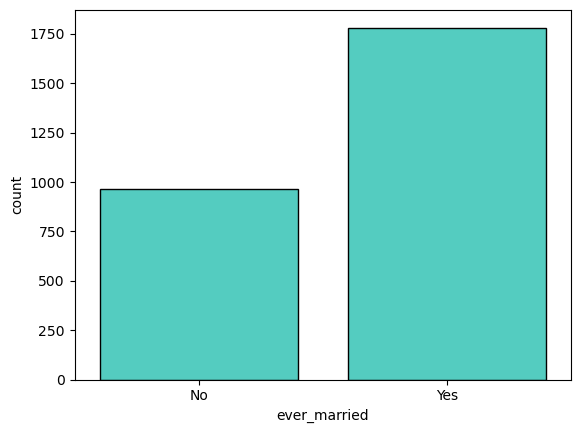

Univariate assessment of feature work_type:


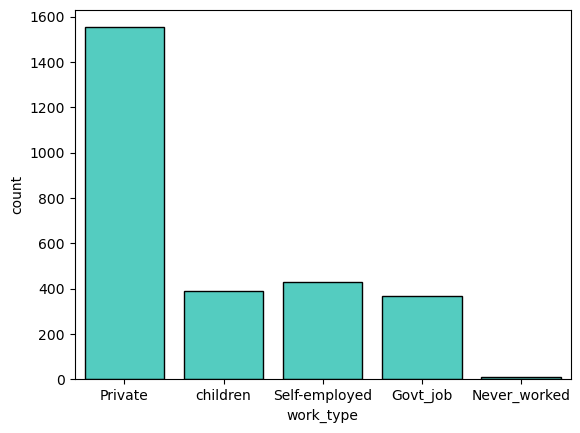

Univariate assessment of feature residence_type:


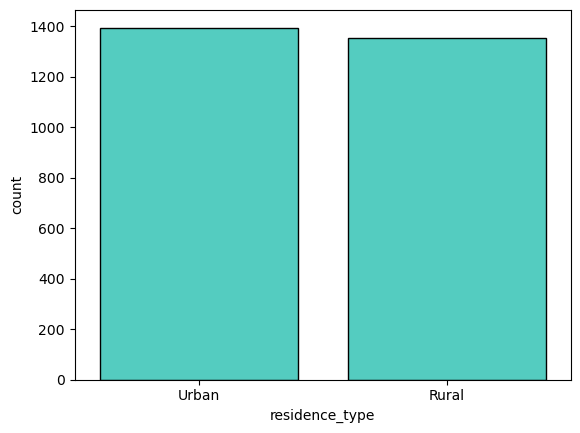

Univariate assessment of feature stroke:


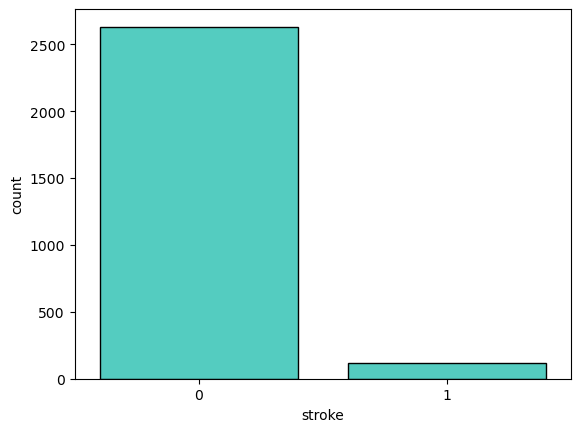

Univariate assessment of feature age_bins:


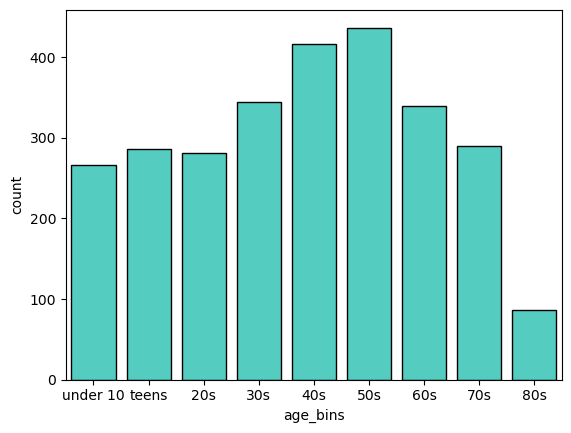

Univariate assessment of feature glucose_bins:


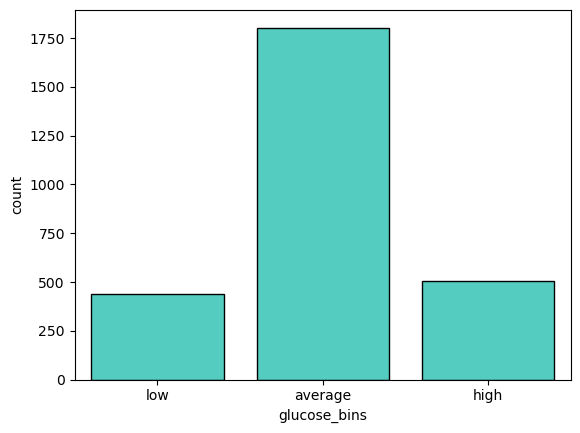

Univariate assessment of feature bmi_bins:


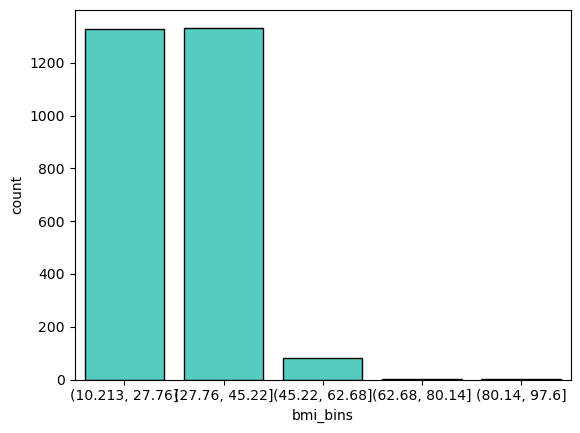

Univariate feature analysis of feature age: 


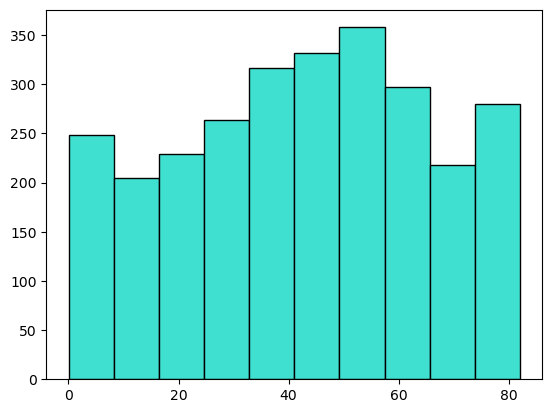

Univariate feature analysis of feature avg_glucose_level: 


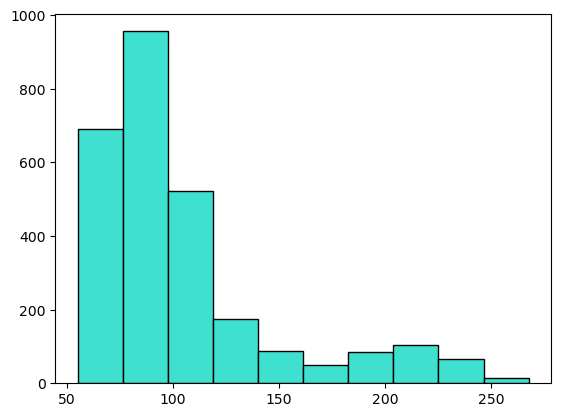

Univariate feature analysis of feature bmi: 


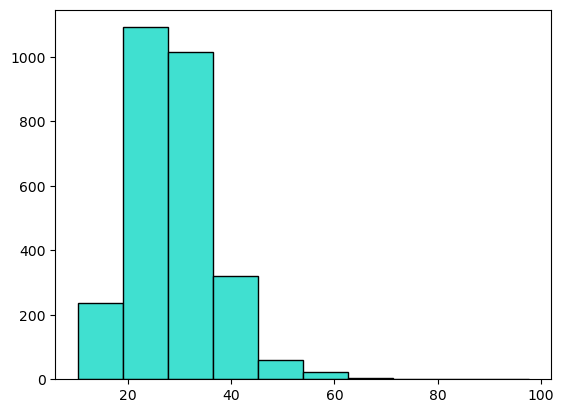

_____________________________________________________
_____________________________________________________

Numeric Columns: ['age', 'avg_glucose_level', 'bmi']
Categorical Columns: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'stroke', 'age_bins', 'glucose_bins', 'bmi_bins']
Bivariate assessment of feature gender:


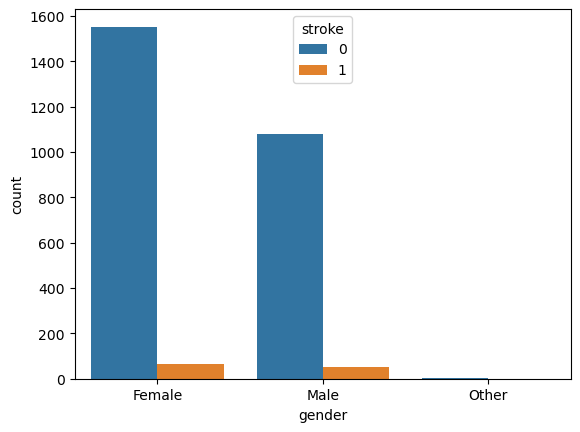

Bivariate assessment of feature hypertension:


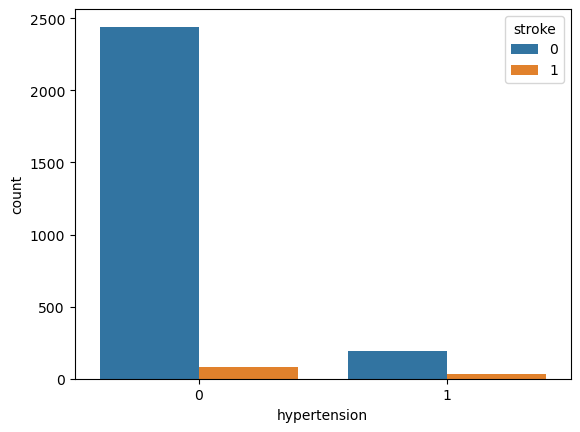

Bivariate assessment of feature heart_disease:


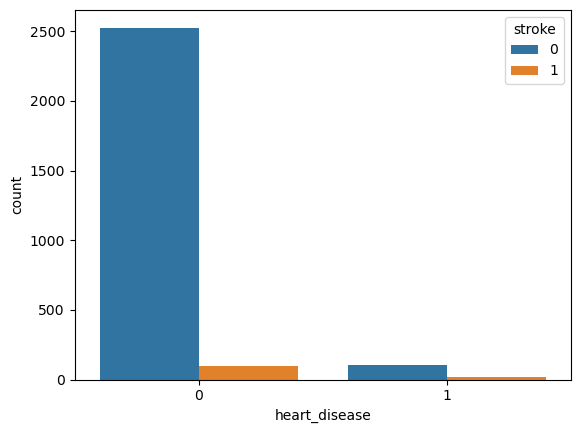

Bivariate assessment of feature ever_married:


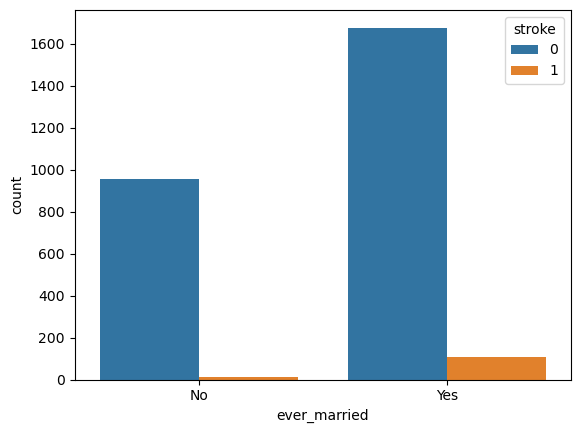

Bivariate assessment of feature work_type:


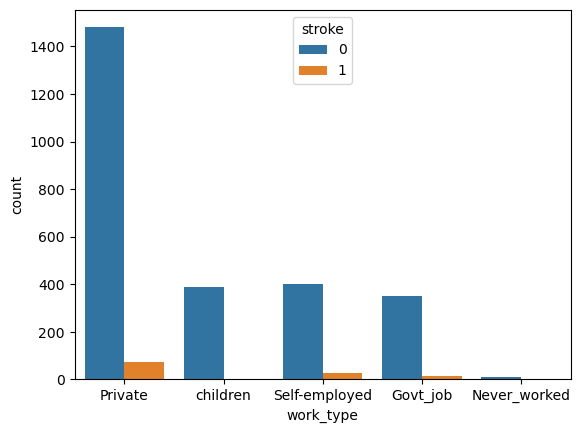

Bivariate assessment of feature residence_type:


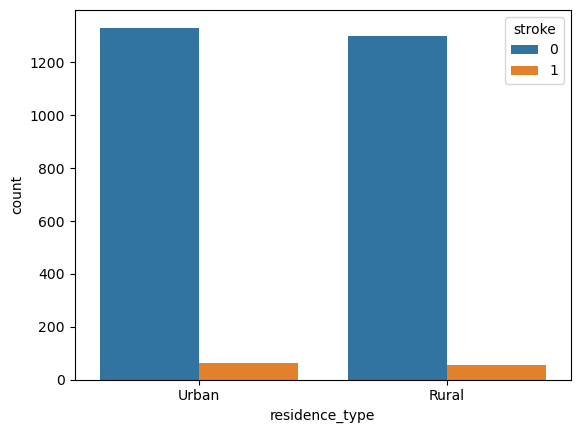

Bivariate assessment of feature age_bins:


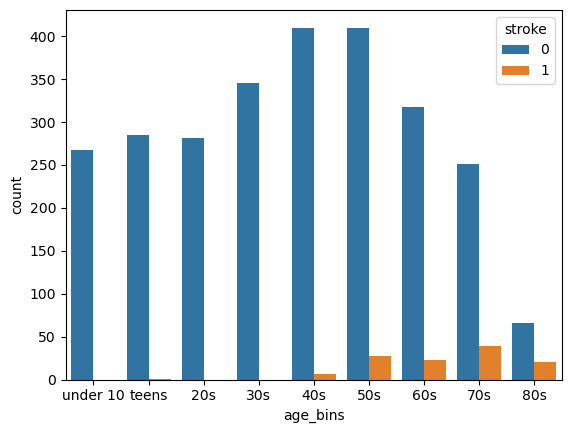

Bivariate assessment of feature glucose_bins:


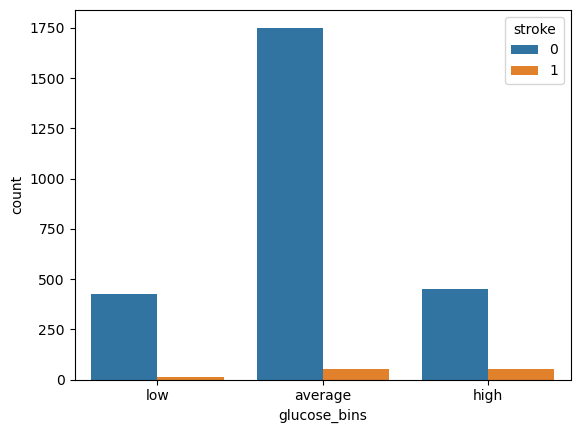

Bivariate assessment of feature bmi_bins:


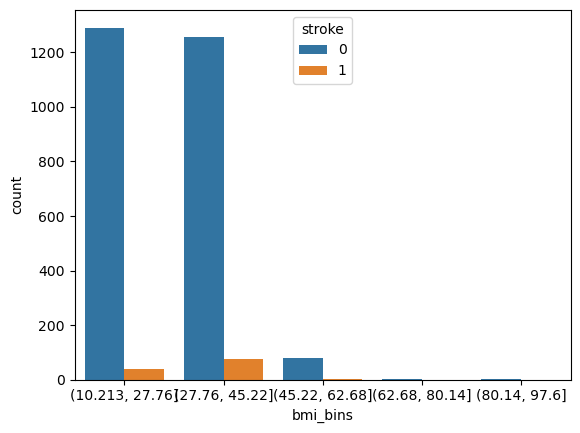

Bivariate feature analysis of feature age: 


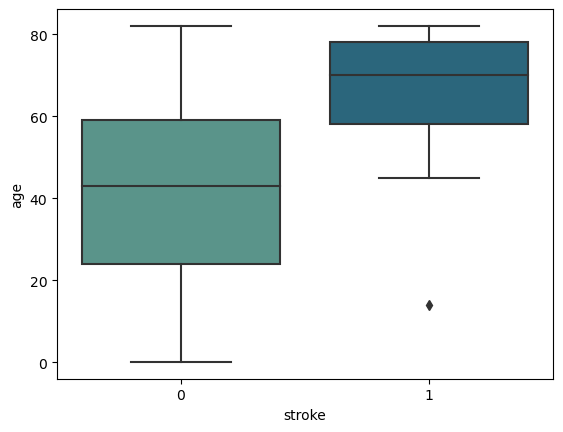

Bivariate feature analysis of feature avg_glucose_level: 


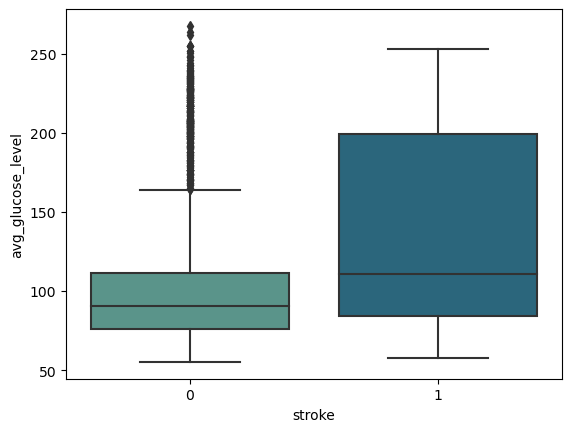

Bivariate feature analysis of feature bmi: 


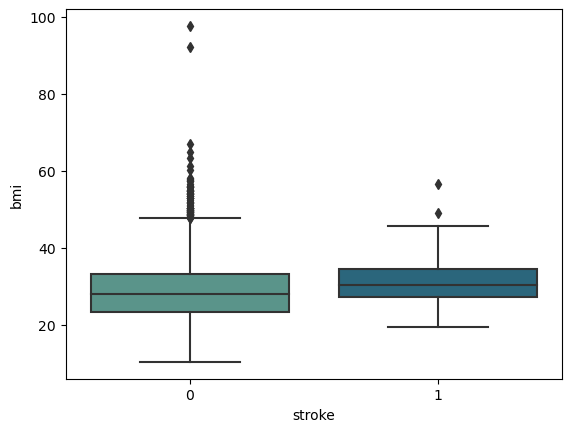

_____________________________________________________
_____________________________________________________



<Figure size 2000x1500 with 0 Axes>

In [3]:
# getting visuals
viz_explore(train, 'stroke')

#### Univariate Takeaways:
* 'gender' - more female
* 'age'
* 'hypertension' - much more with no hypertension
* 'heart_disease' - much more with no heart disease
* 'ever_married' - much more that have been married before
    * note: ever married is not a great measur. this incluydes people who have been divorced or widowed which can be an import social factor impacting the health of the individual. 
* 'work_type' - most are in private
* 'residence_type' - split on rural and urban
* 'avg_glucose_level' - not normal
* 'bmi' - right sskewed
* 'stroke'
* 'age_bins' - pretty uniform
* 'glucose_bins' - most have average glucose levels
* 'bmi_bins'

Later:
* investigate the 'never worked' value

In [4]:
def bivariate_visulization(df, target):
    cat_cols, num_cols = [], []
    for col in df.columns:
        if df[col].dtype == "o":
            cat_cols.append(col)
        else:
            if df[col].nunique() < 10:
                cat_cols.append(col)
            else:
                num_cols.append(col)
    print(f'Numeric Columns: {num_cols}')
    print(f'Categorical Columns: {cat_cols}')
    explore_cols = cat_cols + num_cols
    for col in explore_cols:
        if col in cat_cols:
            if col != target:
                print(f'Bivariate assessment of feature {col}:')
                sns.countplot(data = df, x = df[col], hue = df[target])
#                 (df.groupby(target)[col].value_counts(normalize=True).unstack(col).plot.bar(stacked=True))
                plt.show()
        if col in num_cols:
            if col != target:
                print(f'Bivariate feature analysis of feature {col}: ')
                sns.boxplot(x = df[target], y = df[col], palette='crest')
                plt.show()
                
    print('_____________________________________________________')
    print('_____________________________________________________')
    print()

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [6]:
# load dataset
# tips = sns.load_dataset("tips")
train.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,stroke,age_bins,glucose_bins,bmi_bins
3446,Female,21.0,0,0,No,Private,Urban,88.51,20.5,0,20s,average,"(10.213, 27.76]"
4302,Male,30.0,0,0,No,Private,Urban,63.42,28.0,0,30s,low,"(27.76, 45.22]"
1107,Female,22.0,0,0,No,Private,Urban,73.40,21.6,0,20s,average,"(10.213, 27.76]"


In [7]:
train

# set the figure size
plt.figure(figsize=(14, 14))

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

In [8]:
# # from raw value to percentage
# total = tips.groupby('day')['total_bill'].sum().reset_index()
# smoker = tips[tips.smoker=='Yes'].groupby('day')['total_bill'].sum().reset_index()
# smoker['total_bill'] = [i / j * 100 for i,j in zip(smoker['total_bill'], total['total_bill'])]
# total['total_bill'] = [i / j * 100 for i,j in zip(total['total_bill'], total['total_bill'])]

total = train.groupby('gender')['stroke'].sum().reset_index()
subset = train[train['gender'] == train['gender'][0]].groupby('gender')['stroke'].sum().reset_index()
subset

,gender,stroke
0,Male,53


In [9]:
total

,gender,stroke
0,Female,64
1,Male,53
2,Other,0


In [10]:
[(i, j )for i, j in zip(subset['stroke'], total['stroke'])]


[(53, 64)]

In [11]:
# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

ValueError: Could not interpret input 'day'

In [ ]:
bivariate_visulization(train, 'stroke')

#### Bivariate Takeaways (Features + Target):
* Gender: Does not appear to have a large impact, females have a slightly larger impact
    * explore this more with a multivariate analysis
* Hypertension: having hypertension associated with an increase risk in stoke - difference
* Heart disease -  heart disease associated with stroke risk
* Ever married - being married associated with stroke risk
* Stoke: increased risk of stroke for privately employed and self-employed people
* Residence - Barely any change
* Age - Definite influence
* Avg glucose - Appears to have a relationships present
* BMI - does not appear to have a large impact on stroke risk - binned does have a slight change?

#### Actions:
* Features to take to modeling: 
    * 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'age_bins', 'glucose_bins', 'bmi_bins'
* Stats Test
    * chi-squared
 
#### Later:
* Multivariate analysis
    * Gender
* More robust feature engineering
    * Clustering
* Look into multicollinerartiy wih groups

In [ ]:
train.columns

In [ ]:
(train.groupby('bmi_bins')['stroke'].value_counts(normalize=True)
   .unstack('stroke').plot.bar(stacked=True))

In [ ]:
(train.groupby('age_bins')['stroke'].value_counts(normalize=True)
   .unstack('stroke').plot.bar(stacked=True))

In [ ]:
(train.groupby('glucose_bins')['stroke'].value_counts(normalize=True)
   .unstack('stroke').plot.bar(stacked=True))

# Stats testing

In [5]:
import scipy.stats as  stats

In [6]:
target = 'stroke'
for col in train:
    # get observed values
    observed = pd.crosstab(train[col], train[target])
    
    # get stats
    chi2, p, degf, expected = stats.chi2_contingency(observed)

    # print a new line
    print(f'===={col}====')

    # print the chi2 value, formatted to a float with 4 digits. 
    print(f'chi^2 = {chi2:.4f}') 

    # print the p-value, formatted to a float with 4 digits. 
    print(f'p     = {p:.4f}\n')

====gender====
chi^2 = 2.6989
p     = 0.2594

====age====
chi^2 = 260.2828
p     = 0.0000

====hypertension====
chi^2 = 36.1927
p     = 0.0000

====heart_disease====
chi^2 = 70.4085
p     = 0.0000

====ever_married====
chi^2 = 29.9720
p     = 0.0000

====work_type====
chi^2 = 25.0503
p     = 0.0000

====residence_type====
chi^2 = 0.0286
p     = 0.8658

====avg_glucose_level====
chi^2 = 2533.3481
p     = 0.0360

====bmi====
chi^2 = 348.7827
p     = 0.9011

====smoking_status====
chi^2 = 20.6578
p     = 0.0001

====stroke====
chi^2 = 2723.5231
p     = 0.0000

====age_bins====
chi^2 = 177.9182
p     = 0.0000

====glucose_bins====
chi^2 = 45.1909
p     = 0.0000

====bmi_bins====
chi^2 = 17.7923
p     = 0.0005



In [ ]:
train.corr()
# sns.heatmap(data=train, corner = True)
# plt.show()

In [205]:
def eval_results(train, col):
    '''
    this function will take in the p-value, alpha, and a name for the 2 variables 
    you are comparing (group 1 and group 2)
    '''
    # set alpha
    alpha = 0.05
    
    # set target
    target = 'stroke'
    
    # get observed
    observed = pd.crosstab(train[col], train[target])
    
    # get stats
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    
    col = col.replace('_', ' ')
    
    # print results
    if p < alpha:
        print(f'There exists some relationship between {target} and {col}. (p-value: {p})')
    else:
        print(f'There is not a significant relationship between {target} and {col}. (p-value: {p})')
        
    return

In [206]:
eval_results(train, 'age_bins')

There exists some relationship between stroke and age bins. (p-value: 2.501072071092548e-34)


##### Chi-Squared:
>- H$_0$: There is not a significant relationship between stroke and GROUP2.
>- H$_a$: There is a significant relationship between stroke and GROUP2.
>- Confidence Interval: 95%
>- $a$: 0.05

In [11]:
# getting age features and stroke
df = train[['age', 'age_bins', 'stroke']]

In [ ]:
fig, axes = plt.subplot(1, )

# desnsity plot

In [18]:
stroke = df[df['stroke'] == 1]
stroke

,age,age_bins,stroke
197,69.0,60s,1
49,39.0,30s,1
156,50.0,50s,1
80,59.0,50s,1
233,77.0,70s,1
...,...,...,...
166,56.0,50s,1
87,70.0,70s,1
125,72.0,70s,1
90,79.0,70s,1


In [198]:
def get_stroke_visual(train):
    '''
    Get a count plot for stroke in the train dataset
    '''
    
    sns.set()
    sns.countplot(train['stroke'].replace([1, 0], ['Stroke', 'No Stroke']), palette=['b', 'r'], alpha=.5, ec=['b', 'r'], linewidth=1)
    plt.ylabel('Count')
    plt.xlabel('Stroke')
    plt.legend()
    plt.title('Imbalanced Stroke Values')
    plt.show()
    
    
    return

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


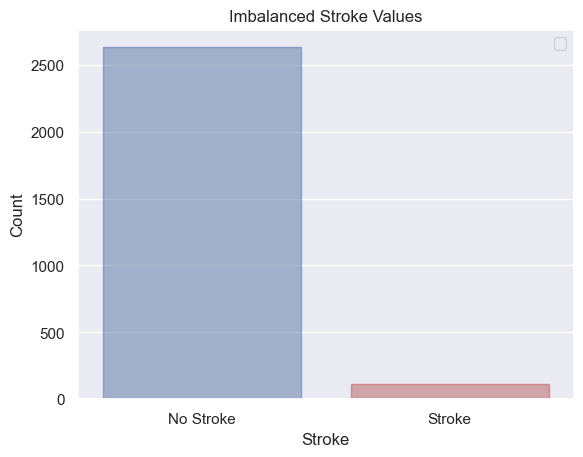

In [199]:
get_stroke_visual(train)

In [184]:
def get_age_visual(train):
    '''
    Actions: gets plot with the age density of those who had a stroke and those who did not have a stroke
    Modules:
        1. import seaborn as sns
        2. import matplotlib.pyplot as plt
    '''
    
    # getting two dataframes, one with only people who had a stroke a 
    no_stroke = train[train['stroke'] != 1]
    
    stroke = train[train['stroke'] == 1]
    

    # plotting both distibutions on the same figure
    fig = sns.kdeplot(stroke['age'], shade=True, color = "r", label = 'Stroke')
    fig = sns.kdeplot(no_stroke['age'], shade=True, color="b", label = 'No Stroke')
    plt.xlabel('Age')
    plt.title('Stroke Risk Higher with Age')
    plt.legend(loc='upper left')
    plt.show()
    
    return

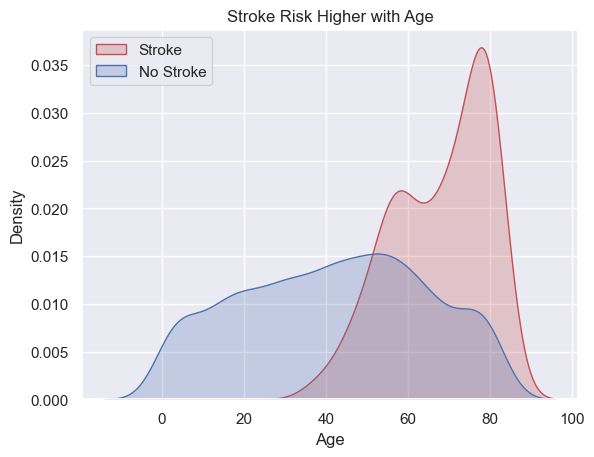

In [185]:
get_age_visual(train)

In [188]:
def get_blood_sugar_visual(train):
    '''
    Get a density graph with stroke risk of people based on blood sugar levels
    '''
    
    # getting two dataframes, one with only people who had a stroke a 
    no_stroke = train[train['stroke'] != 1]

    stroke = train[train['stroke'] == 1]
    
    # setting he style

    # plotting both distibutions on the same figure
    fig = sns.kdeplot(no_stroke['avg_glucose_level'], shade=True, color="b", label = 'No Stroke')
    fig = sns.kdeplot(stroke['avg_glucose_level'], shade=True, color = "r", label = 'Stroke')
    plt.xlabel('Average Blood Sugar Levels')
    plt.title('Two Blood Sugar Peaks: Average & High')
    plt.legend(loc='upper left')
    plt.xticks()
    plt.show()
    
    return

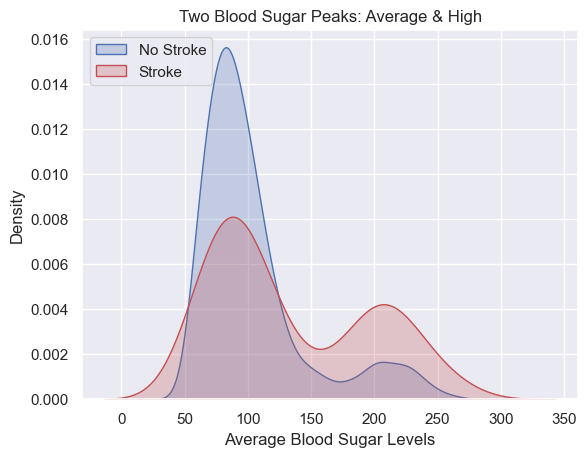

In [187]:
get_blood_sugar_visual(train)

In [194]:
def get_gender_visual(train):
    '''
    Gets barchart with proportion of each gender that have a stroke or dont have a stroke
    '''
    (train.groupby('gender')['stroke'].value_counts(normalize=True)
       .unstack('stroke').plot.bar(stacked=True, color=['b', 'r'], alpha=.5))
    plt.ylabel('Proportion')
    plt.xlabel('Gender')
    plt.legend(['No Stroke', 'Stroke'], loc = 'lower right')
    plt.xticks(rotation=0)
    plt.title('No Association between Gender & Stroke')
    plt.show()
    
    return 

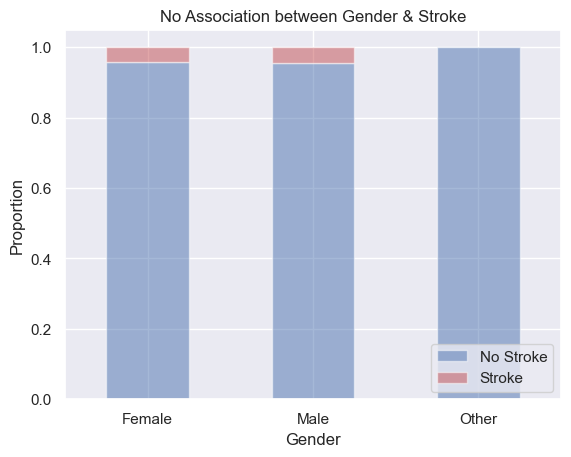

In [195]:
get_gender_visual(train)

In [167]:
train.groupby('stroke')['work_type'].value_counts(normalize=True).unstack('work_type')

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,0.128088,0.004561,0.569745,0.154694,0.142911
1,0.170940,NaN,0.572650,0.256410,NaN


In [181]:
train.groupby('work_type')['stroke'].value_counts(normalize=True)

work_type      stroke
Govt_job       0         0.943978
               1         0.056022
Never_worked   0         1.000000
Private        0         0.957216
               1         0.042784
Self-employed  0         0.931350
               1         0.068650
children       0         1.000000
Name: stroke, dtype: float64

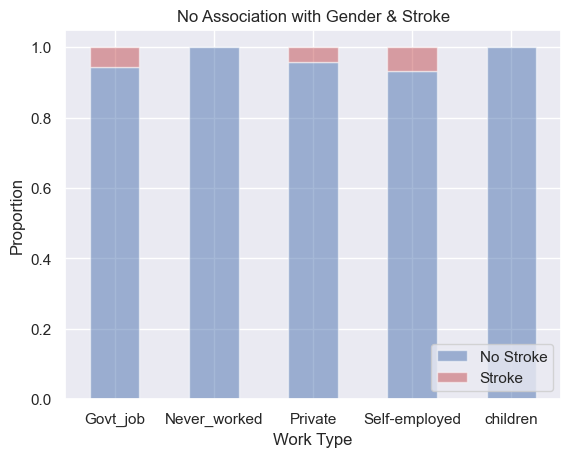

In [178]:
(train.groupby('work_type')['stroke'].value_counts(normalize=True)
   .unstack('stroke').plot.bar(stacked=True, color=['b', 'r'], alpha=.5))
plt.ylabel('Proportion')
plt.xlabel('Work Type')
plt.legend(['No Stroke', 'Stroke'], loc = 'lower right')
plt.xticks(rotation=0)
plt.title('No Association with Gender & Stroke')
plt.show()